In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
np.random.seed(613) # set seed
x = np.arange(50) # 0,1,...,49
y = np.random.randint(0,100,50) # 50 random integers with min = 0, max = 99

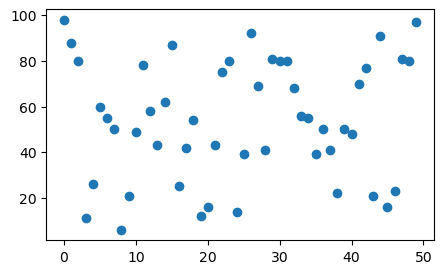

In [8]:
fig,ax = plt.subplots(figsize=(5,3)) # figure size
ax.scatter(x,y)

<BarContainer object of 50 artists>

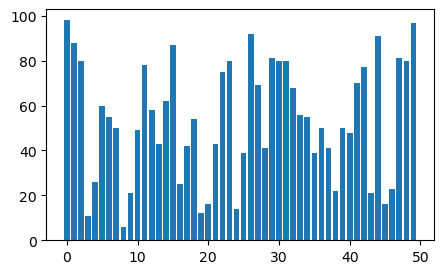

In [11]:
 fig,ax = plt.subplots(figsize=(5,3)) 
ax.bar(x,y)

<BarContainer object of 50 artists>

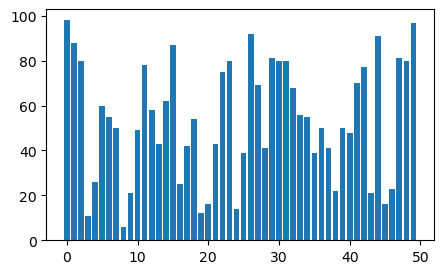

In [16]:
fig,ax = plt.subplots(figsize=(5,3))
ax.bar(x,y)

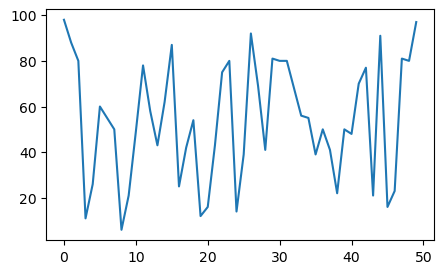

In [17]:
fig,ax = plt.subplots(figsize=(5,3))
ax.plot(x,y)

In [ ]:
ax.hist(y)

(array([4., 6., 2., 5., 7., 6., 4., 3., 9., 4.]),
 array([ 6. , 15.2, 24.4, 33.6, 42.8, 52. , 61.2, 70.4, 79.6, 88.8, 98. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Years since start')

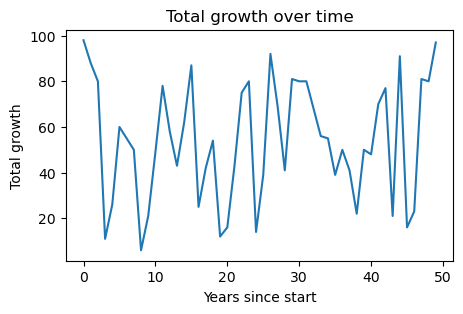

In [ ]:
fig,ax = plt.subplots(figsize=(5,3)) 
ax.plot(x,y)

ax.set_title('Total growth over time')
ax.set_ylabel('Total growth')
ax.set_xlabel('Years since start')

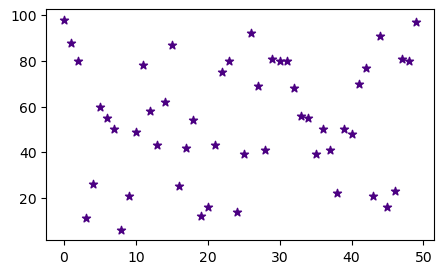

In [ ]:
fig,ax = plt.subplots(figsize=(5,3)) 
ax.scatter(x,y,
          marker = '*', # >, +, etc
          color = 'indigo')
linestye = '--',
linewidth = 2,
markersize = 12,
markeredgecolor = '#fa9359',
markerfacecolor = 'black'


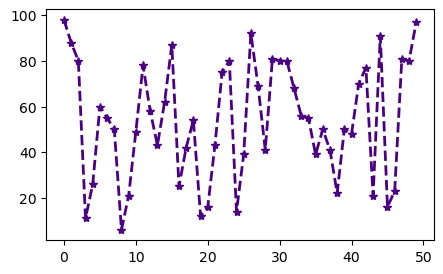

In [18]:
fig,ax = plt.subplots(figsize=(5,3)) 
ax.plot(x,y,
          marker = '*', 
          color = 'indigo',
          linestyle = '--',
          linewidth = 2)

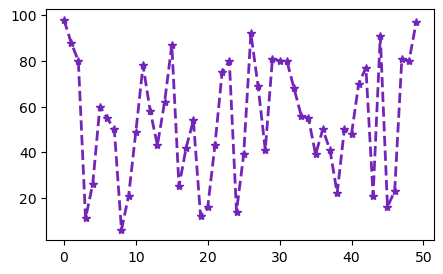

In [19]:
fig,ax = plt.subplots(figsize=(5,3)) 
ax.plot(x,y,
          marker = '*', 
          color = '#7425b9',
          linestyle = '--',
          linewidth = 2)

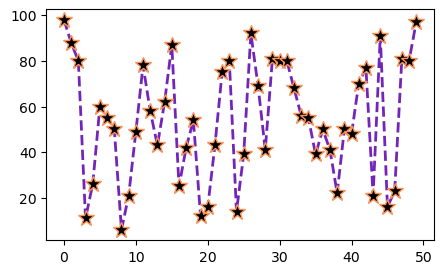

In [20]:
fig,ax = plt.subplots(figsize=(5,3)) 
ax.plot(x,y,
        marker = '*', 
        color = '#7425b9',
        linestyle = '--',
        linewidth = 2,
        markersize = 12,
        markeredgecolor = '#fa9359',
        markerfacecolor = '#000000'
       )
 

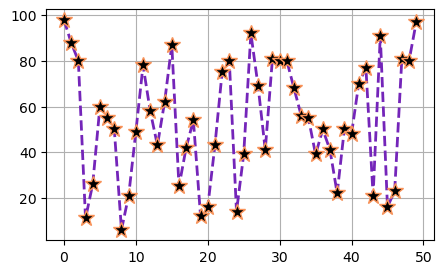

In [24]:
fig,ax = plt.subplots(figsize=(5,3)) 
ax.plot(x,y,
        marker = '*', 
        color = '#7425b9',
        linestyle = '--',
        linewidth = 2,
        markersize = 12,
        markeredgecolor = '#fa9359',
        markerfacecolor = '#000000'
       )

ax.grid() # both
 #ax.grid(axis = 'x') vertical
 #ax.grid(axis = 'y') horizontal

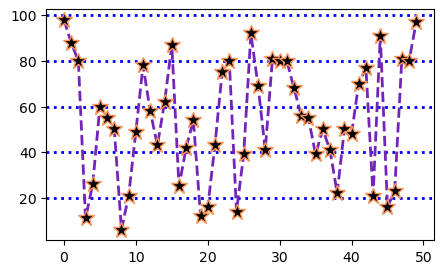

In [ ]:
fig,ax = plt.subplots(figsize=(5,3)) 
ax.plot(x,y,
        marker = '*', 
        color = '#7425b9',
        linestyle = '--',
        linewidth = 2,
        markersize = 12,
        markeredgecolor = '#fa9359',
        markerfacecolor = '#000000'
       )
 # Modify grid line styles
ax.grid(axis = 'y',
        linestyle = 'dotted',
        linewidth = 2,
        color = 'blue') 
